In [1]:
# packages
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

In [2]:
# reading in data from file
df = pd.read_csv("./data/01_24_20_0932.csv", index_col=0)

In [3]:
# splitting dataframe
n = len(df)
step = 15

data_1 = df[:step]
data_2 = df[step:step*2]
data_3 = df[step*2:step*3]
data_4 = df[step*3:]

ls = [data_1, data_2, data_3, data_4]

# for data in ls:
#     display(data)
#     break
    
display(data_1.sort_values(by=["beta"], axis=0, ascending=False))
# display(data_1.sort_values(by=["shareOutstanding"], axis=0, ascending=True))

,beta,volume_10_day,c,o,adx,signal,trending,shareOutstanding,bearish,bullish
GRWG,3.12335,3.63656,49.84,48.1600,74.077543,buy,True,36.88,0.0000,1.0000
SQ,2.58165,9.14422,222.88,219.0000,42.632426,buy,True,432.80,0.0000,1.0000
AMD,2.19114,50.01342,92.79,94.4200,43.169276,buy,True,1170.00,0.2500,0.7500
TSLA,2.11570,43.80479,846.64,834.3100,56.341688,buy,True,905.00,0.1539,0.8461
ROKU,1.95563,5.58816,422.85,422.0000,54.301020,buy,True,119.90,0.0000,1.0000
SHAK,1.73000,1.08799,111.21,107.2600,47.741585,strong buy,True,37.56,0.5000,0.5000
PLUG,1.71386,77.23934,66.87,62.3000,59.676549,strong buy,True,303.38,0.2500,0.7500
NVDA,1.40356,8.66204,548.50,549.6035,46.849504,buy,True,613.00,0.0000,1.0000
GM,1.39498,28.97006,55.40,54.5000,41.418633,buy,True,1400.00,0.0000,1.0000
GME,1.37064,34.07252,65.01,42.5900,57.857005,strong buy,True,64.30,0.8000,0.2000


In [21]:
# stocks we're interested in getting options data
option_stocks = data_1.sort_values(by=["beta"], axis=0, ascending=False)
# display(option_stocks)

for stock in option_stocks.index:
    display(stock)
    
    # get options dates
    s = yf.Ticker(str(stock))
    try:
        dates = list(s.options)
    except:
        continue
    
    # get options data for first two dates
    for date in dates[:2]:
        display(date)
        
        # get call options chain
        call_chain = s.option_chain(date)[0]
#         display(call_chain)
        
        for index, row in call_chain.iterrows():
            display(index)
#             vol = row["impliedVolatility"]
#             if float(vol) > .50:
#                 display(row)
            break
        
        # get put options chain
#         put_chain = s.option_chain(date)[1]

'GRWG'

'2021-01-29'

0

'2021-02-05'

0

'SQ'

'2021-01-29'

0

'2021-02-05'

0

'AMD'

'2021-01-29'

0

'2021-02-05'

0

'TSLA'

'2021-01-29'

0

'2021-02-05'

0

'ROKU'

'2021-01-29'

KeyboardInterrupt: 

In [ ]:
# plots

'-- adx --'

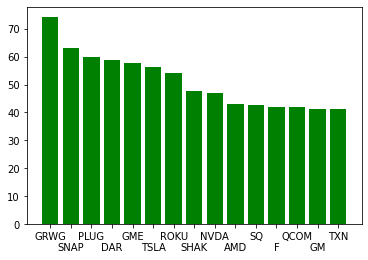

'-- volume_10_day --'

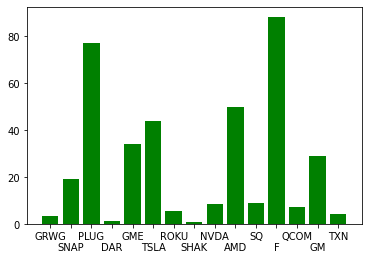

'-- beta --'

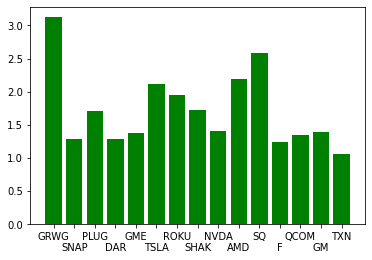

'-- shareOutstanding --'

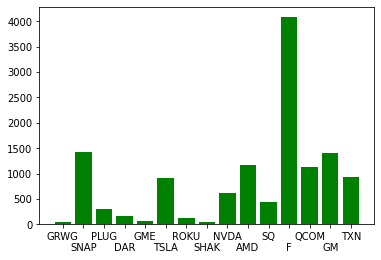

In [8]:
# plot for adx
display("-- adx --")
fig, ax = plt.subplots()
ax.bar(data_1.index, data_1["adx"], color='g')

ax.set_xticks(range(len(data_1.index)))
ax.set_xticklabels(data_1.index)
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()

display("-- volume_10_day --")
# plot for volume_10_day
fig, ax = plt.subplots()
ax.bar(data_1.index, data_1["volume_10_day"], color='g')

ax.set_xticks(range(len(data_1.index)))
ax.set_xticklabels(data_1.index)
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()

display("-- beta --")
# plot for beta
fig, ax = plt.subplots()
ax.bar(data_1.index, data_1["beta"], color='g')

ax.set_xticks(range(len(data_1.index)))
ax.set_xticklabels(data_1.index)
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()

display("-- shareOutstanding --")
# plot for shareOutstanding
fig, ax = plt.subplots()
ax.bar(data_1.index, data_1["shareOutstanding"], color='g')

ax.set_xticks(range(len(data_1.index)))
ax.set_xticklabels(data_1.index)
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()